In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
train_data=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
test_data=ImageDataGenerator(rescale=1./255)

In [37]:
x_train=train_data.flow_from_directory(r"E:\assignment3\dataset\Training",target_size=(64,64),batch_size=32,class_mode="categorical")
x_test=test_data.flow_from_directory(r"E:\assignment3\dataset\Testing",target_size=(64,64),batch_size=32,class_mode="categorical")

Found 3453 images belonging to 5 classes.
Found 864 images belonging to 5 classes.


In [38]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [39]:
model=Sequential()

In [41]:
model.add(Convolution2D(64,(3,3),input_shape=(64,64,3),activation='relu'))

In [42]:
model.add(MaxPooling2D(pool_size=(3,3)))

In [43]:
model.add(Flatten())

In [49]:
model.add(Dense(units=5,kernel_initializer="random_uniform",activation="softmax"))

In [50]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [51]:
model.fit_generator(x_train,steps_per_epoch=108,epochs=30,validation_data=x_test,validation_steps=27)

C:\Users\Smile\AppData\Local\Temp\ipykernel_19908\1932184935.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=108,epochs=30,validation_data=x_test,validation_steps=27)


Epoch 1/30
108/108 [==============================] - 88s 798ms/step - loss: 1.6050 - accuracy: 0.2299 - val_loss: 1.6017 - val_accuracy: 0.2431
Epoch 2/30
108/108 [==============================] - 70s 646ms/step - loss: 1.6005 - accuracy: 0.2438 - val_loss: 1.5994 - val_accuracy: 0.2431
Epoch 3/30
108/108 [==============================] - 71s 654ms/step - loss: 1.5992 - accuracy: 0.2438 - val_loss: 1.5989 - val_accuracy: 0.2431
Epoch 4/30
108/108 [==============================] - 70s 648ms/step - loss: 1.5988 - accuracy: 0.2438 - val_loss: 1.5987 - val_accuracy: 0.2431
Epoch 5/30
108/108 [==============================] - 74s 685ms/step - loss: 1.5988 - accuracy: 0.2438 - val_loss: 1.5987 - val_accuracy: 0.2431
Epoch 6/30
108/108 [==============================] - 77s 712ms/step - loss: 1.5986 - accuracy: 0.2438 - val_loss: 1.5985 - val_accuracy: 0.2431
Epoch 7/30
108/108 [==============================] - 80s 739ms/step - loss: 1.5985 - accuracy: 0.2438 - val_loss: 1.5987 - val_ac

In [52]:
model.save("flower.h5")

In [53]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [54]:
import numpy as np

In [55]:
model=load_model("flower.h5")

In [102]:
img=image.load_img("dandelion.jpg",target_size=(64,64))

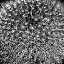

In [103]:
img

In [89]:
type(img)

PIL.Image.Image

In [104]:
x=image.img_to_array(img)

In [105]:
x

array([[[  4.,   4.,   4.],
        [ 11.,  11.,  11.],
        [  9.,   9.,   9.],
        ...,
        [ 11.,  11.,  11.],
        [  9.,   9.,   9.],
        [ 10.,  10.,  10.]],

       [[ 12.,  12.,  12.],
        [ 21.,  21.,  21.],
        [ 19.,  19.,  19.],
        ...,
        [ 15.,  15.,  15.],
        [ 23.,  23.,  23.],
        [  2.,   2.,   2.]],

       [[ 23.,  23.,  23.],
        [ 52.,  52.,  52.],
        [ 41.,  41.,  41.],
        ...,
        [ 49.,  49.,  49.],
        [ 34.,  34.,  34.],
        [ 42.,  42.,  42.]],

       ...,

       [[ 56.,  56.,  56.],
        [121., 121., 121.],
        [ 44.,  44.,  44.],
        ...,
        [113., 113., 113.],
        [ 24.,  24.,  24.],
        [ 12.,  12.,  12.]],

       [[ 54.,  54.,  54.],
        [ 30.,  30.,  30.],
        [ 36.,  36.,  36.],
        ...,
        [102., 102., 102.],
        [ 42.,  42.,  42.],
        [ 10.,  10.,  10.]],

       [[ 23.,  23.,  23.],
        [ 20.,  20.,  20.],
        [ 11.,  

In [92]:
x.shape

(64, 64, 3)

In [94]:
x=np.expand_dims(x,axis=0)

In [95]:
pred_prob=model.predict(x)

1/1 [==============================] - 0s 63ms/step


In [96]:
pred_prob

array([[0.17660806, 0.24450503, 0.18085377, 0.17052399, 0.22750916]],
      dtype=float32)

In [99]:
class_name=["Daisy","Dandelion","Rose","Sunflower","Tulip"]
pred_id=pred_prob.argmax(axis=1)[0]

In [100]:
pred_id

1

In [101]:
print("Predicted animalis ",str(class_name[pred_id]))

Predicted animalis  Dandelion
